# CS3033/CS6405 - Data Mining - Second Assignment

Your Name - Your ID - Your Module Code (CS3033 or CS6405)

### Submission

You should submit a single .ipnyb file with your python code and analysis electronically via Canvas. Please note that this assignment will account for 25 Marks of your module grade.


### Declaration

By submitting this assignment. I agree to the following:

<font color="red">“I have read and understand the UCC academic policy on plagiarism, and agree to the requirements set out thereby in relation to plagiarism and referencing. I confirm that I have referenced and acknowledged properly all sources used in the preparation of this assignment.
I declare that this assignment is entirely my own work based on my personal study. I further declare that I have not engaged the services of another to either assist me in, or complete this assignment”</font>Physical fatigue significantly impacts performance, safety, and health in domains such as sports, rehabilitation, and workplace ergonomics. Traditional methods for estimating fatigue, such as subjective self-reports, often lack accuracy and real-time applicability. Leveraging wearable sensors like Inertial Measurement Units (IMU) and Electromyography (EMG) provides objective biomechanical data, capturing kinematic and neuromuscular changes during repetitive or prolonged physical activities.

The provided dataset was collected from 27 physically active participants performing shoulder internal rotation (IR) and external rotation (ER) exercises at varying resistance levels (30-40%, 40-50%, and 50-60% of their maximal voluntary contraction).
Your task is to develop a regression-based machine learning model to estimate perceived fatigue (Borg RPE scores) using the provided sensor data.

## Data Preparation

In [9]:
# Importing the 'pandas' library so the file can be read
import pandas as pd

# Defining the ID of the file 
file_id = '1DP3G49DWVUaRBkn7wssPi6CfY1pTmTQP'

# Creating link to load the CSV
url = f'https://drive.google.com/uc?id={file_id}'

# Load in the dataset
df = pd.read_csv(url)

# Look at the first few rows and columns of the original dataset 
df.head()



,Subject,Repetition,X_Shoulder_acc_MPSD,X_Shoulder_acc_Freq_MPSD,X_Shoulder_acc_Power_Dominant_Band,X_Shoulder_acc_Ratio_Dominant_Band,X_Shoulder_acc_Total_LowFreq_Power,X_Shoulder_acc_Total_HighFreq_Power,X_Shoulder_acc_LowHigh_FreqRatio,X_Shoulder_acc_Total_Power,...,Magnitude_Palm_gyr_rtVar_Max,Magnitude_Palm_gyr_rtVar_Min,Magnitude_Palm_gyr_rtVar_Range,Magnitude_Palm_gyr_rtVar_RMS,Magnitude_Palm_gyr_rtVar_Energy,Magnitude_Palm_gyr_rtVar_IQR,Magnitude_Palm_gyr_rtVar_Skewness,Magnitude_Palm_gyr_rtVar_Kurtosis,RepetitionDuration_Palm_gyr_rtVar,Borg
0,1,1,2068.313,0.000,0.000,0.000,2318.602,154.645,14.993,2473.247,...,0.153,-0.170,0.324,0.051,0.797,0.059,-0.465,1.233,3.10,9.355
1,1,2,150.884,0.699,150.884,0.183,503.764,322.154,1.564,825.919,...,0.148,-0.196,0.344,0.056,0.892,0.064,-0.184,0.645,2.86,9.653
2,1,3,342.205,0.000,0.000,0.000,862.122,197.057,4.375,1059.179,...,0.104,-0.107,0.211,0.040,0.479,0.051,0.007,0.133,2.99,9.946
3,1,4,574.134,0.000,0.000,0.000,1007.744,195.604,5.152,1203.347,...,0.149,-0.177,0.325,0.056,0.908,0.069,-0.240,0.136,2.91,10.240
4,1,5,146.332,1.993,146.332,0.123,826.328,364.276,2.268,1190.603,...,0.160,-0.197,0.357,0.058,1.018,0.069,-0.144,0.439,3.01,10.536


<Axes: >

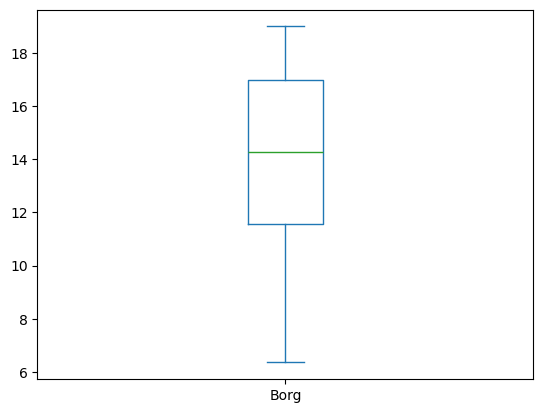

In [10]:
# Label or target variable
df['Borg'].plot.box()

# Tasks

## Basic models and evaluation

Using Scikit-learn, train and evaluate K-NN and decision tree regressors using 70% of the dataset from training and 30% for testing. For this part of the project, we are not interested in optimising the parameters; we just want to get an idea of the dataset.
Compare the results of both classifiers and comment on their execution time in the test.


In [11]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time # [1]
import warnings # [2]

# This hides any warning messages so the ouput is cleaner
warnings.filterwarnings("ignore")

# Shows the names and data types of all the columns 
print(df.dtypes)

# Remove the Repetition and Subject Columns 
# They dont provide any statistically realiable data 
df = df.drop(columns=['Repetition', 'Subject'])

# Shows the first few rows and columns of the new dataset
print(df.head())

# Assigns the input variables as everything except for "Borg" 
X = df.drop('Borg', axis=1)
# Assigns the output variables as "Borg"
y = df['Borg']

# Performs a train test split of (70:30)%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialise Regressors of KNN and Decision Trees and results dictionary
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
results = {}

# Creates a function to evaluate the model
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):    
    
    # Measures the time it takes to train the model
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Measures the time it takes to make predictions on the test data
    start_time = time.time()
    y_pred = model.predict(X_test)
    test_time = time.time() - start_time
    
    # Measures performance metrics (Mean Squared Error, Mean Absolute Error and R Squared)    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {
        'model': model_name,
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'train_time': train_time,
        'test_time': test_time
    }

# Stores the evaluated results from both regressors into the results dictionary
results['knn'] = evaluate_model(knn, 'K-Nearest Neighbors', X_train, X_test, y_train, y_test)
results['dt'] = evaluate_model(dt, 'Decision Tree', X_train, X_test, y_train, y_test)
results_df = pd.DataFrame(results.values()) # Prints a resulting dataframe with all the results printed in the next chunk of code

# Prints the results
print(results_df)
print("\nCompare")
print("1. Performance Metrics:")
print(f"   - MSE: K-NN ({results['knn']['mse']:.4f}) vs Decision Tree ({results['dt']['mse']:.4f})")
print(f"   - MAE: K-NN ({results['knn']['mae']:.4f}) vs Decision Tree ({results['dt']['mae']:.4f})")
print(f"   - R²: K-NN ({results['knn']['r2']:.4f}) vs Decision Tree ({results['dt']['r2']:.4f})")
print(f"\n2. Execution Time:")
print(f"   - Training time: K-NN ({results['knn']['train_time']:.4f}s) vs Decision Tree ({results['dt']['train_time']:.4f}s)")
print(f"   - Testing time: K-NN ({results['knn']['test_time']:.4f}s) vs Decision Tree ({results['dt']['test_time']:.4f}s)")

Subject                                 int64
Repetition                              int64
X_Shoulder_acc_MPSD                   float64
X_Shoulder_acc_Freq_MPSD              float64
X_Shoulder_acc_Power_Dominant_Band    float64
                                       ...   
Magnitude_Palm_gyr_rtVar_IQR          float64
Magnitude_Palm_gyr_rtVar_Skewness     float64
Magnitude_Palm_gyr_rtVar_Kurtosis     float64
RepetitionDuration_Palm_gyr_rtVar     float64
Borg                                  float64
Length: 2173, dtype: object
   X_Shoulder_acc_MPSD  X_Shoulder_acc_Freq_MPSD  \
0             2068.313                     0.000   
1              150.884                     0.699   
2              342.205                     0.000   
3              574.134                     0.000   
4              146.332                     1.993   

   X_Shoulder_acc_Power_Dominant_Band  X_Shoulder_acc_Ratio_Dominant_Band  \
0                               0.000                               0.000   

K-NN is generally fast to train (0.0659) because it only stores data, but is somewhat slow to predict (0.2192) because it requires distance calculations.
Decision Trees are generally slow to train (8.5804) because they require split points, but are very fast to predict (0.0206).

## Robust evaluation

In this section, try to improve the accuracy by creating a pipeline. Consider the techniques we have covered during the semester, and try to improve the accuracy of a Decision tree regressor.
Your report should provide concrete information of your reasoning; everything should be well-explained.
Do not get stressed if the things you try do not improve the accuracy. The key to getting good marks is to show that you evaluated different methods and that you correctly selected the configuration.


In [12]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures # [3]
from sklearn.feature_selection import SelectKBest, f_regression # [4] [5]
import matplotlib.pyplot as plt

# Assessing the Baseline Model compared to the improved on Decision Trees
base_dt = DecisionTreeRegressor(random_state=42)
base_dt.fit(X_train, y_train)
y_pred_base = base_dt.predict(X_test)

# Records the performance metrics of the baseline model
base_metrics = {
    'mse': mean_squared_error(y_test, y_pred_base),
    'mae': mean_absolute_error(y_test, y_pred_base),
    'r2': r2_score(y_test, y_pred_base)
}


# Create a Pipeline to make the preprocessing steps more concise with "steps" establishes the order of steps in the pipeline 
# Normalises the features while polynomial features expands the features without adding a constant term
numeric_transformer = Pipeline(steps=[ # [6]
    ('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2, include_bias=False)) 
])

# Keep all the best predictive features based on its F score where "k = all" means no features were removed
feature_selector = SelectKBest(score_func=f_regression, k='all') 
# Decission Tree Regressor 
dt_regressor = DecisionTreeRegressor(random_state=42)

# Another pipeline which includes the preprocessing feature selection and the regression 
pipeline = Pipeline([
    ('preprocessor', numeric_transformer),
    ('feature_selector', feature_selector),
    ('regressor', dt_regressor)
])

# Defines a grid of parameters which will be put through hyperparameterisation (via: GridSearchCV)
param_grid = {
    'preprocessor__poly__degree': [1, 2],
    'feature_selector__k': [5, 10, 'all'],
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]   
}

# Performs grid search and runs through it 5 times (cv = 5) to increase the results reliability
# neg_mean_squared_error was picked as it is more sensitive to larger distances between predicted and actual values [absolute error]
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Calculating the run time for this gridsearch
print("Starting grid search...")
start_time = time.time()
grid_search.fit(X_train, y_train)
print(f"Grid search completed in {time.time() - start_time:.2f} seconds")

# Shows the best combination parameters used for the improved model
best_model = grid_search.best_estimator_

# Predicts with the improved model
y_pred_improved = best_model.predict(X_test)

# Calculates the values of each of the performance metrics for the improved model
improved_metrics = {
    'mse': mean_squared_error(y_test, y_pred_improved),
    'mae': mean_absolute_error(y_test, y_pred_improved),
    'r2': r2_score(y_test, y_pred_improved)
}


print("\n=== Baseline Model ===")
print(f"MSE: {base_metrics['mse']:.4f}")
print(f"MAE: {base_metrics['mae']:.4f}")
print(f"R²: {base_metrics['r2']:.4f}")

print("\n=== Improved Model ===")
print(f"MSE: {improved_metrics['mse']:.4f}")
print(f"MAE: {improved_metrics['mae']:.4f}")
print(f"R²: {improved_metrics['r2']:.4f}")

print("\nBest parameters found:")
print(grid_search.best_params_)

Starting grid search...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Grid search completed in 1137.28 seconds

=== Baseline Model ===
MSE: 11.3595
MAE: 2.5711
R²: -0.0815

=== Improved Model ===
MSE: 8.2979
MAE: 2.3191
R²: 0.2100

Best parameters found:
{'feature_selector__k': 'all', 'preprocessor__poly__degree': 1, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2}


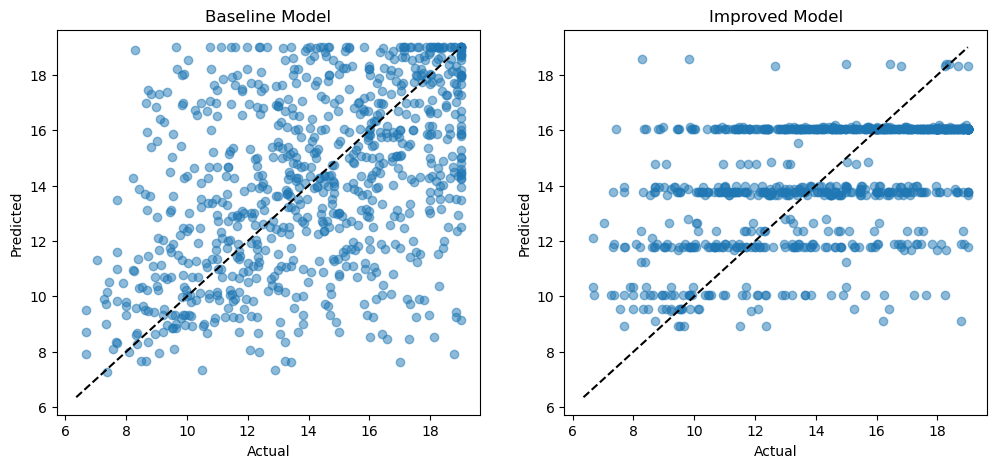

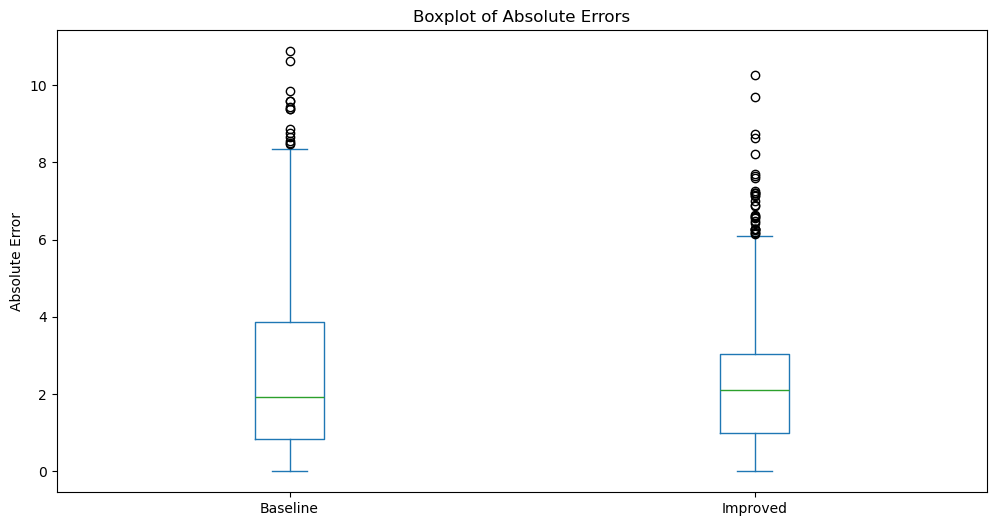

In [13]:

# Scatter plot comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(y_test, y_pred_base, alpha=0.5)
ax[0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
ax[0].set_title('Baseline Model')
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')

# The Scatter plot of the improved model
ax[1].scatter(y_test, y_pred_improved, alpha=0.5)
ax[1].plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
ax[1].set_title('Improved Model')
ax[1].set_xlabel('Actual')
ax[1].set_ylabel('Predicted')

# Boxplot visualising the absolute errors (Shows how close the predictions are to the actual results)
errors_base = np.abs(y_test - y_pred_base)
errors_improved = np.abs(y_test - y_pred_improved)

# Make a dataframe of the absolute errors so they can be plotted together
errors_df = pd.DataFrame({
    'Baseline': errors_base,
    'Improved': errors_improved
})

# Plot the results as a boxplot 
errors_df.plot.box(title="Boxplot of Absolute Errors", figsize = (12,6), ylabel="Absolute Error")

plt.show()

Scatter plot: Predictions from the improved model are seen to be closer to the ideal line (although its somewhat hard to see), while the baseline model shows more scatter of predictions. 

Boxplot: The improved model has  less spread, meaning it makes more reliable mistakes overall.

To improve the baseline, the data was preprocessed, scaled and underwent feature selection. Polynomial features were included to capture interactions, but degree=1, chosen by GridSearchCV showed no added value and acted as a control. PCAs were avoided to maintain interpretability for tree-based models.

SelectKBest was chosen over tree-based feature importance to ensure a model-agnostic feature filter based on statistical relevance (ANOVA F-value).

The best model used a max_depth=5 and min_samples_leaf=4, to reduce overfitting in the data. Feature expansion selecting all features "k=all" meaning no features were removed. While Polynomial Features didn't directly make a significant difference, the improved pipeline achieved R² = 0.21, a clear improvement in making accurate predictions compared to the baseline model of R² = -0.08. 


## New classifier

Replicate the previous task for a classifier that we did not cover in class (different than K-NN and decision trees). Briefly describe and justify your choice.
Try to create the best model for the given dataset.

In [14]:
from sklearn.ensemble import GradientBoostingRegressor # [7]
from sklearn.model_selection import RandomizedSearchCV # [8]

# Create a pipeline to simplify the preprocessing and model training of the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gbr', GradientBoostingRegressor(random_state=42))
])
# Set up parameters within a dictionary for hyperparameter tuning 
# [Similar parameters to the decision tree are used because gbr is an ensemble technique of many trees]
param_dist = {    
    'gbr__n_estimators': [50, 100, 200], # How many trees are combined to make the final model
    'gbr__learning_rate': [0.01, 0.1, 0.2],
    'gbr__max_depth': [3, 5, 7],
    'gbr__min_samples_split': [2, 5],
    'gbr__min_samples_leaf': [1, 2],    
}

# Randomly samples different combinations of the hyperparameters which runs faster than GridSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=30, # 30 random combinations from random search
    cv=3,      
    scoring='neg_mean_squared_error', # More sensitive to large errors
    n_jobs=-1, # Speeds up the training by using all of the CPU cores
    random_state=42, # Makes the results reproducible
    verbose=1 # Allows us to track the results
)

# Time the model after fitting it
print("Training Gradient Boosting with RandomSearchCV...")
start_time = time.time()
random_search.fit(X_train, y_train) # Fitting the model wih the training data using the randomisedsearchcv
print(f"Training completed in {time.time() - start_time:.2f} seconds")

# Define the best model for predictions using the Gradient Boosting Regressor
best_gb = random_search.best_estimator_
y_pred_gb = best_gb.predict(X_test)

# Calculate the performance metrics for this model
gb_metrics = {
    'mse': mean_squared_error(y_test, y_pred_gb),
    'mae': mean_absolute_error(y_test, y_pred_gb),
    'r2': r2_score(y_test, y_pred_gb)
}

# Create a Data Frame which compares the decision tree to the gradient boosting
results = pd.DataFrame({
    'Decision Tree': improved_metrics,
    'Gradient Boosting': gb_metrics
})


print("\n=== Performance Comparison ===")
print(results)

print("\nBest Parameters for Gradient Boosting:")
print(random_search.best_params_)

# Create a feature importance dataframe in sorted order
feature_importances = best_gb.named_steps['gbr'].feature_importances_ # [9] Extracts the feature importance from the Gradient Boosting
features = X.columns 
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}) # Creates a dataframe of these features and their importance
importance_df = importance_df.sort_values('Importance', ascending=False) # Sorts it in descending

print("\nTop 10 Important Features:")
print(importance_df.head(10))

Training Gradient Boosting with RandomSearchCV...
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Training completed in 4276.77 seconds

=== Performance Comparison ===
     Decision Tree  Gradient Boosting
mse       8.297893           4.235346
mae       2.319093           1.654050
r2        0.209965           0.596757

Best Parameters for Gradient Boosting:
{'gbr__n_estimators': 200, 'gbr__min_samples_split': 2, 'gbr__min_samples_leaf': 2, 'gbr__max_depth': 5, 'gbr__learning_rate': 0.1}

Top 10 Important Features:
                               Feature  Importance
1657               Z_Upperarm_acc_Mean    0.094673
950                 MinAngle_Y_Forearm    0.054865
1565               Y_Shoulder_acc_Mean    0.040303
1688                  Y_Torso_acc_Mean    0.030341
1739                   Z_Palm_acc_Mean    0.021946
988                   MeanAngle_X_Palm    0.016373
1698                  Z_Torso_acc_Mean    0.013196
149   Y_Upperarm_acc_LowHigh_FreqRatio    0.011055
952     

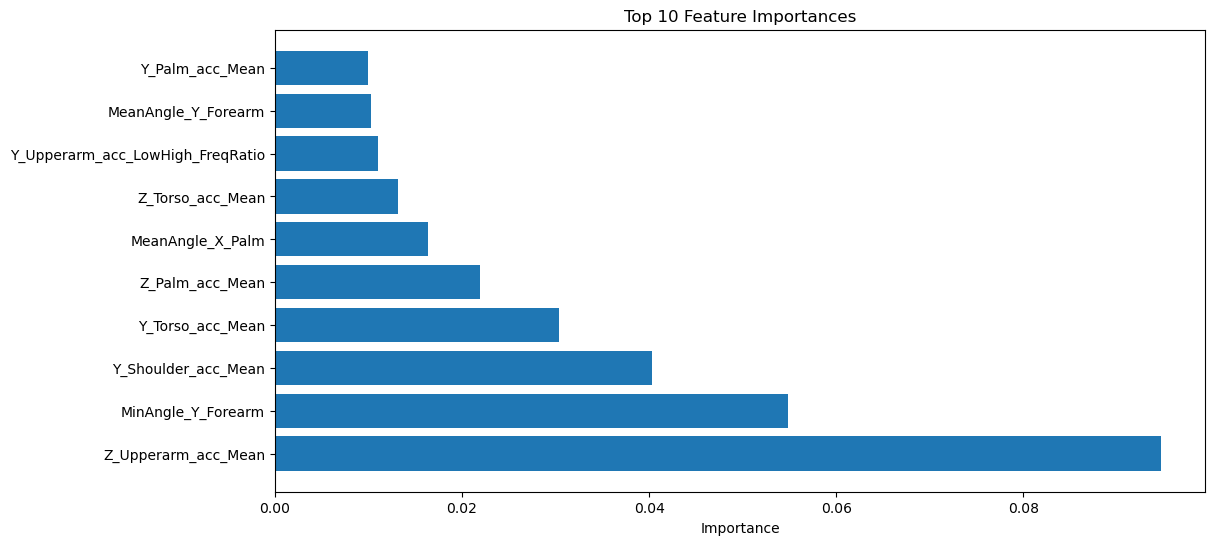

In [15]:
# [10] Visualising the feature importance as a horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()

The bar chart shows the features that influence the gradient boosting model the most. Z_Upperarm_acc_Mean and MinAngle_Y_Forearm are shown to be the most important, possibly because they capture significant physical effort or posture during exercise, which should have a correlation  with the Borg score. Less important features such as Y_Palm_acc_Mean  contribute less meaningful variation possibly due to human error or where the sensor signals are placed (further analysis would be using the "corr()" function in pandas to test this hypothesis).

Gradient boosting regressor (GBR) is a powerful ensemble machine learning technique for regression tasks (predicting continuous numeric values). It was chosen because it is able to capture patterns between non-linear data unlike linear models (Simple Linear Regression). It was also found to outperform Decision Trees in all metrics (lower MSE: 4.24 vs 16.65, lower MAE: 1.65 vs 3.21 and a higher R²: 0.60 vs -0.58), making it the a very effective regressor for this data.

In [16]:
import joblib

# Saves the best model that was trained with Gradient Boosting (Reusable without retraining)
joblib.dump(best_gb, 'model2.joblib')

['model2.joblib']

## Evaluation on unseen instances (Only for CS6405)
Save your best model into your github. And create a single code cell that loads it and evaluate it on the following test dataset:
https://raw.githubusercontent.com/andvise/DM_Assignment_2425/refs/heads/main/test_data.csv

This link currently contains a sample of the training set. The real test set will be released after the submission. I should be able to run the code cell independently and load all the libraries you need as well.



In [17]:
from joblib import dump, load
from io import BytesIO
import requests
import pandas as pd

# INSERT YOUR MODEL'S URL
mLink =  'https://github.com/Seanwalsh21/CS6405_2425_Assignment2/raw/refs/heads/main/model2.joblib'
mfile = BytesIO(requests.get(mLink).content)
model = load(mfile)

df = pd.read_csv("https://raw.githubusercontent.com/andvise/DM_Assignment_2425/refs/heads/main/test_data.csv")


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Put the model through the same input and outputs but for the test data
df1 = df.drop(columns=['Repetition', 'Subject'])
X_test = df1.drop('Borg', axis=1)
y_test = df1['Borg']
predictions = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, predictions):.4f}")
print(f"MAE: {mean_absolute_error(y_test, predictions):.4f}")
print(f"R² Score: {r2_score(y_test, predictions):.4f}")

MSE: 4.4314
MAE: 1.7065
R² Score: 0.5773


The model's performance metrics showed that large deviations from the actual results to the predicted are heavily penalised (MSE = 4.4314), the model predicts that on average the predictions had a small deviation from the outputs value (Borg), by 1.71 on average and lastly the total variance tjat can be explained by our best model is roughly 57.7% (R² = 0.577). Therefore overall the model shows its able to mitigate extreme outliars from causing bias, shows good predictions in relation to the Borg values and is able to capture some useful patterns in the data but not all. Improving this further would require looking at alternative ensemble methods to capture more complicated patterns in the data. 

## References

1: https://realpython.com/python-time-module/

2: https://docs.python.org/3/library/warnings.html#warning-filter

3: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

4: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

5: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

6: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

7: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

8: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

9: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

10: https://www.geeksforgeeks.org/draw-a-horizontal-bar-chart-with-matplotlib/